In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as web

In [57]:
indian_stock_list=["RELIANCE.NS","SBIN.NS","INFY.NS","IRCTC.NS","TCS.NS","HINDUNILVR.NS"]
print('indian_stock_list:', indian_stock_list)
data_1 = yf.download(indian_stock_list, start="2020-01-01", end="2022-09-22")['Adj Close']
print('data fields downloaded:', set(data_1.columns.get_level_values(0)))
data_1.head

indian_stock_list: ['RELIANCE.NS', 'SBIN.NS', 'INFY.NS', 'IRCTC.NS', 'TCS.NS', 'HINDUNILVR.NS']
[*********************100%***********************]  6 of 6 completed
data fields downloaded: {'IRCTC.NS', 'HINDUNILVR.NS', 'TCS.NS', 'INFY.NS', 'SBIN.NS', 'RELIANCE.NS'}


<bound method NDFrame.head of             HINDUNILVR.NS      INFY.NS    IRCTC.NS  RELIANCE.NS     SBIN.NS  \
Date                                                                          
2020-01-01    1832.502930   690.363281  186.413559  1480.595825  326.298187   
2020-01-02    1833.922363   688.348938  183.659882  1505.802124  331.029938   
2020-01-03    1823.892090   698.936096  183.857269  1507.616577  325.566467   
2020-01-06    1812.536743   692.237122  176.563385  1472.651367  311.224731   
2020-01-07    1817.504517   681.978027  179.119675  1495.307617  310.639374   
...                   ...          ...         ...          ...         ...   
2022-09-15    2543.335205  1417.310913  724.349976  2562.699951  572.150024   
2022-09-16    2511.300293  1362.163574  703.000000  2499.199951  561.799988   
2022-09-19    2562.059814  1375.270264  692.000000  2502.449951  572.250000   
2022-09-20    2566.331055  1373.539185  706.150024  2502.850098  574.049988   
2022-09-21    2606.114

In [72]:
data_1.head(3)

,HINDUNILVR.NS,INFY.NS,IRCTC.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,
2020-01-01,1832.502930,690.363281,186.413559,1480.595825,326.298187,2075.235352
2020-01-02,1833.922363,688.348938,183.659882,1505.802124,331.029938,2065.708984
2020-01-03,1823.892090,698.936096,183.857269,1507.616577,325.566467,2106.876953


In [71]:
data_1.tail(3)

,HINDUNILVR.NS,INFY.NS,IRCTC.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,
2022-09-19,2562.059814,1375.270264,692.000000,2502.449951,572.250000,3020.981689
2022-09-20,2566.331055,1373.539185,706.150024,2502.850098,574.049988,3032.451904
2022-09-21,2606.114258,1362.361328,700.349976,2509.750000,569.700012,2993.452881


In [60]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

<AxesSubplot: xlabel='Date', ylabel='Price in Rs'>

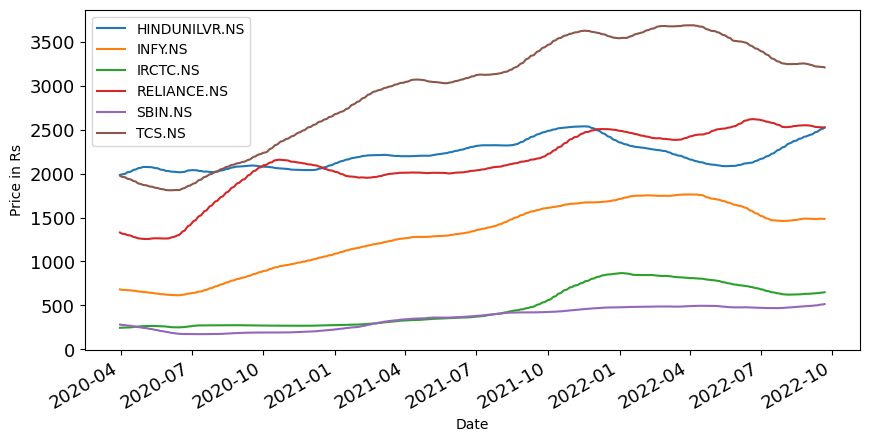

In [61]:
data_1.rolling(63).mean().plot(figsize=(10, 5), ylabel='Price in Rs', fontsize=13)

In [47]:
#calculate the expected ananullized return and annulized simple covariance matrix of the dailyasset return

In [62]:
mu = expected_returns.mean_historical_return(data_1)
S = risk_models.sample_cov(data_1)

In [81]:
#optimize the maximum sharp ratio
arr = np.random.random(6)
arr


array([0.66401449, 0.85657379, 0.5755675 , 0.97340046, 0.60970935,
       0.20865703])

In [82]:
arr[0] + arr[1]+arr[2]+arr[3]+arr[4]+arr[5]

3.8879226137482394

In [64]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

Expected annual return: 47.3%
Annual volatility: 31.6%
Sharpe Ratio: 1.43


(0.4725126933887227, 0.31587092063163474, 1.4325873761467207)

In [65]:
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

In [66]:
portfolio_value=80000

In [67]:
total_portfolio_value=portfolio_value

In [68]:
latest_prices=get_latest_prices(data_1)

In [69]:
latest_prices = get_latest_prices(data_1)

da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=80000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: Rs.{:.2f}".format(leftover))

Discrete allocation: {'IRCTC.NS': 61, 'INFY.NS': 25, 'HINDUNILVR.NS': 1}
Funds remaining: Rs.613.50


In [76]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(data_1)
S = risk_models.sample_cov(data_1)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
print("These are the  weights: ", weights)
cleaned_weights = ef.clean_weights()
print("These are the cleaned weights: ", cleaned_weights)
ef.portfolio_performance(verbose=True)

These are the  weights:  OrderedDict([('HINDUNILVR.NS', 0.0208171253000581), ('INFY.NS', 0.4194579546241728), ('IRCTC.NS', 0.5417208393634377), ('RELIANCE.NS', 0.0180040807123312), ('SBIN.NS', 0.0), ('TCS.NS', 0.0)])
These are the cleaned weights:  OrderedDict([('HINDUNILVR.NS', 0.02082), ('INFY.NS', 0.41946), ('IRCTC.NS', 0.54172), ('RELIANCE.NS', 0.018), ('SBIN.NS', 0.0), ('TCS.NS', 0.0)])
Expected annual return: 47.3%
Annual volatility: 31.6%
Sharpe Ratio: 1.43


(0.4725126933887227, 0.31587092063163474, 1.4325873761467207)

In [75]:
latest_prices = get_latest_prices(data_1)

da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=80000)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: Rs.{:.2f}".format(leftover))

Discrete allocation: {'IRCTC.NS': 61, 'INFY.NS': 25, 'HINDUNILVR.NS': 1}
Funds remaining: Rs.613.50


In [79]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(data_1, frequency=90)
S = risk_models.sample_cov(data_1)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
eights = ef.max_sharpe()
print("These are the raw weights: ", weights)
cleaned_weights = ef.clean_weights()
print("These are the cleaned weights: ", cleaned_weights)
ef.portfolio_performance(verbose=True)

These are the raw weights:  OrderedDict([('HINDUNILVR.NS', 0.0208171253000581), ('INFY.NS', 0.4194579546241728), ('IRCTC.NS', 0.5417208393634377), ('RELIANCE.NS', 0.0180040807123312), ('SBIN.NS', 0.0), ('TCS.NS', 0.0)])
These are the cleaned weights:  OrderedDict([('HINDUNILVR.NS', 0.0), ('INFY.NS', 0.43863), ('IRCTC.NS', 0.55639), ('RELIANCE.NS', 0.00498), ('SBIN.NS', 0.0), ('TCS.NS', 0.0)])
Expected annual return: 14.9%
Annual volatility: 32.2%
Sharpe Ratio: 0.40


(0.14888998286526714, 0.3223289437295328, 0.39987095596794786)